In [74]:
#Dataset: Airfoil Self Noise Dataset
#https://archive.ics.uci.edu/ml/machine-learning-databases/00291/

#### Import Libraries/Dataset

In [75]:
#Loading the Dataset
import pandas as pd
data = pd.read_csv("AirfoilSelfNoise.csv")
#Renaming the columns:
data.columns = ['Frequency', 'AngleAttack', 'ChordLength', 'Velocity', 'SuctionSide', 'Sound_pressure']
print("Count of Rows and Columns: ", data.shape)
data.sample(4)

Count of Rows and Columns:  (1503, 6)


,Frequency,AngleAttack,ChordLength,Velocity,SuctionSide,Sound_pressure
436,5000,7.3,0.2286,39.6,0.012348,111.959
521,6300,2.7,0.1524,71.3,0.002439,121.944
617,800,7.2,0.1524,39.6,0.009092,132.358
1456,6300,12.3,0.1016,39.6,0.040827,107.985


In [76]:
#Exploring the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Frequency       1503 non-null   int64  
 1   AngleAttack     1503 non-null   float64
 2   ChordLength     1503 non-null   float64
 3   Velocity        1503 non-null   float64
 4   SuctionSide     1503 non-null   float64
 5   Sound_pressure  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [77]:
#Features definations:

##The independent variables are as follows:
#Frequency (Hz)
#Angle of Attack (deg)
#Chord Length (m)
#Free-stream velocity (m/s)
#Suction side displacement thickness (m)

##The dependent/Target variable is:
#Scaled sound pressure level (dB)

#### Data Visualization and Exploration

#### 1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [78]:
data.head(2)

#Note: Sound_pressur is Target feature, which is continous values and remaining are independent features.

,Frequency,AngleAttack,ChordLength,Velocity,SuctionSide,Sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


#### 2. Comment on class imbalance with appropriate visualization method.

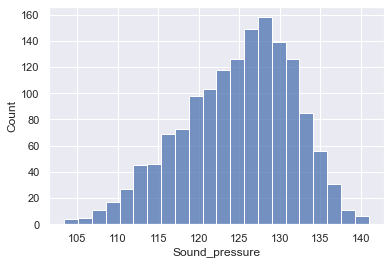

In [79]:
#Distribution of Target
import seaborn as sns
sns.histplot(data=data, x='Sound_pressure')

#Note: Dependent/Target feature (Sound_pressure) is continuos, so here we dont have classes(Like categorical data).
# So, No class imbalance in this data.

#### 3. Provide appropriate visualizations to get an insight about the dataset.

In [80]:
# statistical view on the data
data.describe().T

#Note: Below table shows data variation for each features.
#Frequency: Min Frequency is 200 and Max 20K, with Standard deviation 3152 approx.
#AngleAttack: Min Frequency is 0 and Max 22, with Standard deviation 5.91 approx.
#ChordLength: Min Frequency is 0.025 and Max 0.304, with Standard deviation 0.0935 approx.
#Velocity: Min Frequency is 31.70 and Max 71.3, with Standard deviation 15.572 approx.
#SuctionSide: Min Frequency is 0.0004 and Max 0.058, with Standard deviation 0.013 approx.
#Overall SuctionSide has min SD and Frequency has max SD

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
AngleAttack,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
ChordLength,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
Velocity,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
SuctionSide,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
Sound_pressure,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


In [81]:
data.columns

Index(['Frequency', 'AngleAttack', 'ChordLength', 'Velocity', 'SuctionSide',
       'Sound_pressure'],
      dtype='object')

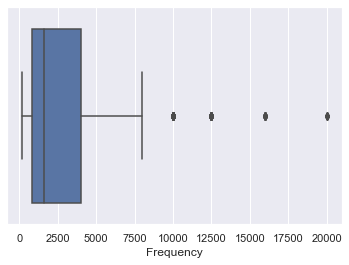

In [82]:
#Outliers detections:
import seaborn as sns
sns.boxplot(data=data, x='Frequency')

#Note
#Frequency has upper tail outliers, with median 1600 Hz

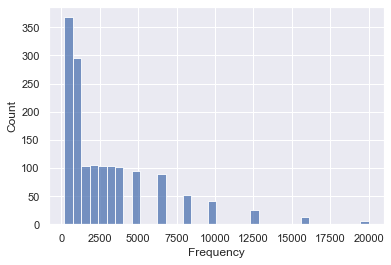

In [83]:
#Frequency  histogram
import seaborn as sns
sns.histplot(data=data, x='Frequency')

#Note
#Frequency is positively skewed

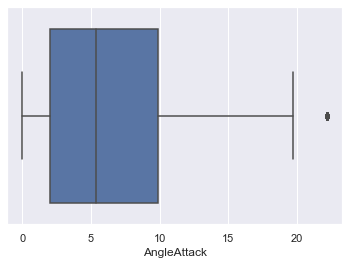

In [84]:
#AngleAttack  boxplot
import seaborn as sns
sns.boxplot(data=data, x='AngleAttack')

#Note
#AngleAttack has upper tail outliers, with median 5.4

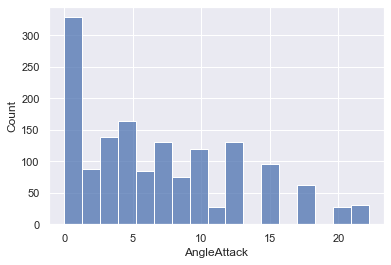

In [85]:
#AngleAttack  histogram
import seaborn as sns
sns.histplot(data=data, x='AngleAttack')

#Note
#AngleAttack is positively skewed

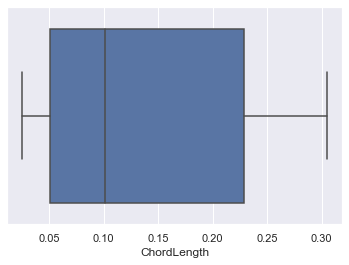

In [86]:
#ChordLength  boxplot
import seaborn as sns
sns.boxplot(data=data, x='ChordLength')

#Note
#ChordLength has NO outliers, with median 0.1016

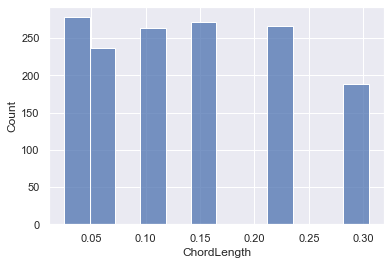

In [87]:
#ChordLength  histogram
import seaborn as sns
sns.histplot(data=data, x='ChordLength')

#Note
#ChordLength values has equal frequency count

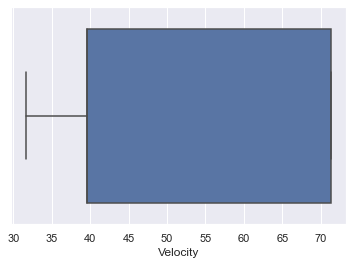

In [88]:
#Velocity  boxplot
import seaborn as sns
sns.boxplot(data=data, x='Velocity')

#Note
#Velocity has NO outliers, with median 39.6

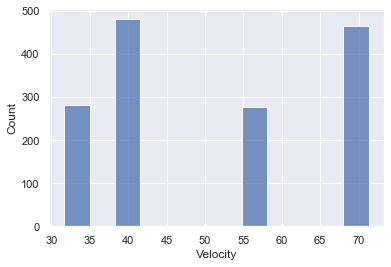

In [89]:
#Velocity  histogram
import seaborn as sns
sns.histplot(data=data, x='Velocity')

#Note
#Velocity values has equal frequency count

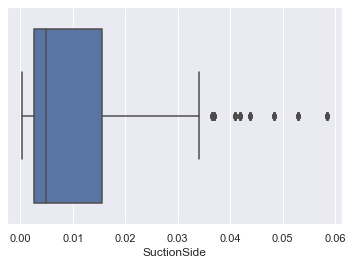

In [90]:
#SuctionSide  boxplot
import seaborn as sns
sns.boxplot(data=data, x='SuctionSide')

#Note
#SuctionSide has upper tail outliers, with median 0.004

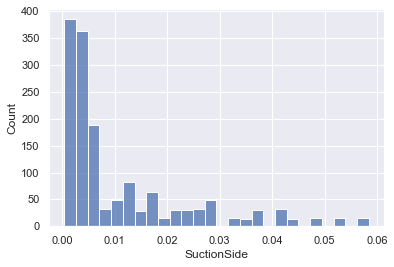

In [91]:
#SuctionSide  histogram
import seaborn as sns
sns.histplot(data=data, x='SuctionSide')

#Note
#SuctionSide is positively skewed

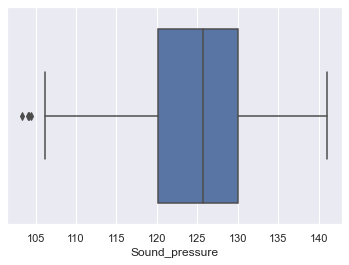

In [92]:
#Sound_pressure  boxplot
import seaborn as sns
sns.boxplot(data=data, x='Sound_pressure')

#Note
#SuctionSide has lower tail outliers, with median 125 appx

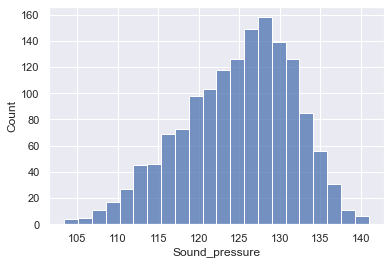

In [93]:
#Sound_pressure  histogram
import seaborn as sns
sns.histplot(data=data, x='Sound_pressure')

#Note
#Sound_pressure is normally distributed

In [94]:
#df = pd.DataFrame(data=data, columns=['Frequency', 'AngleAttack', 'ChordLength', 'Velocity', 'SuctionSide', 'Sound_pressure'])
#sns.boxplot(x="variable", y="value", data=pd.melt(df))
#plt.show()

#### 4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer. Answer without justification will not be awarded marks.

,Frequency,AngleAttack,ChordLength,Velocity,SuctionSide,Sound_pressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AngleAttack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
ChordLength,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
SuctionSide,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Sound_pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


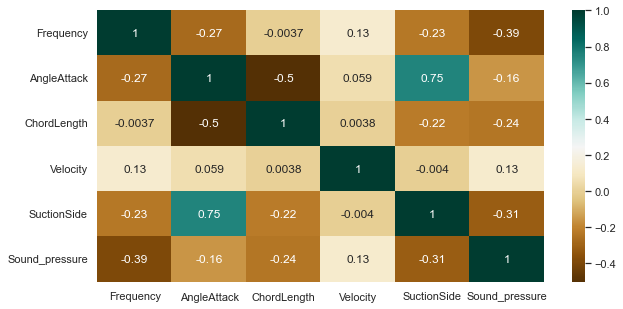

In [95]:
# Correlation between variables and dependent variable
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#Note: 
#We can see Target Sound_pressure feature is medium negatively correlated with Frequency with -0.39
#We can see Target Sound_pressure feature is less  positively correlated with Velocity with 0.125

#Feature selection
#We can see that all independented features are NOT highly positively or negatively correlated with Target feature
#So feature selection via correlation can't be considered, As it does not give strong evidence for feature selection.

#### 5. Any other visualisation specific to the problem statement

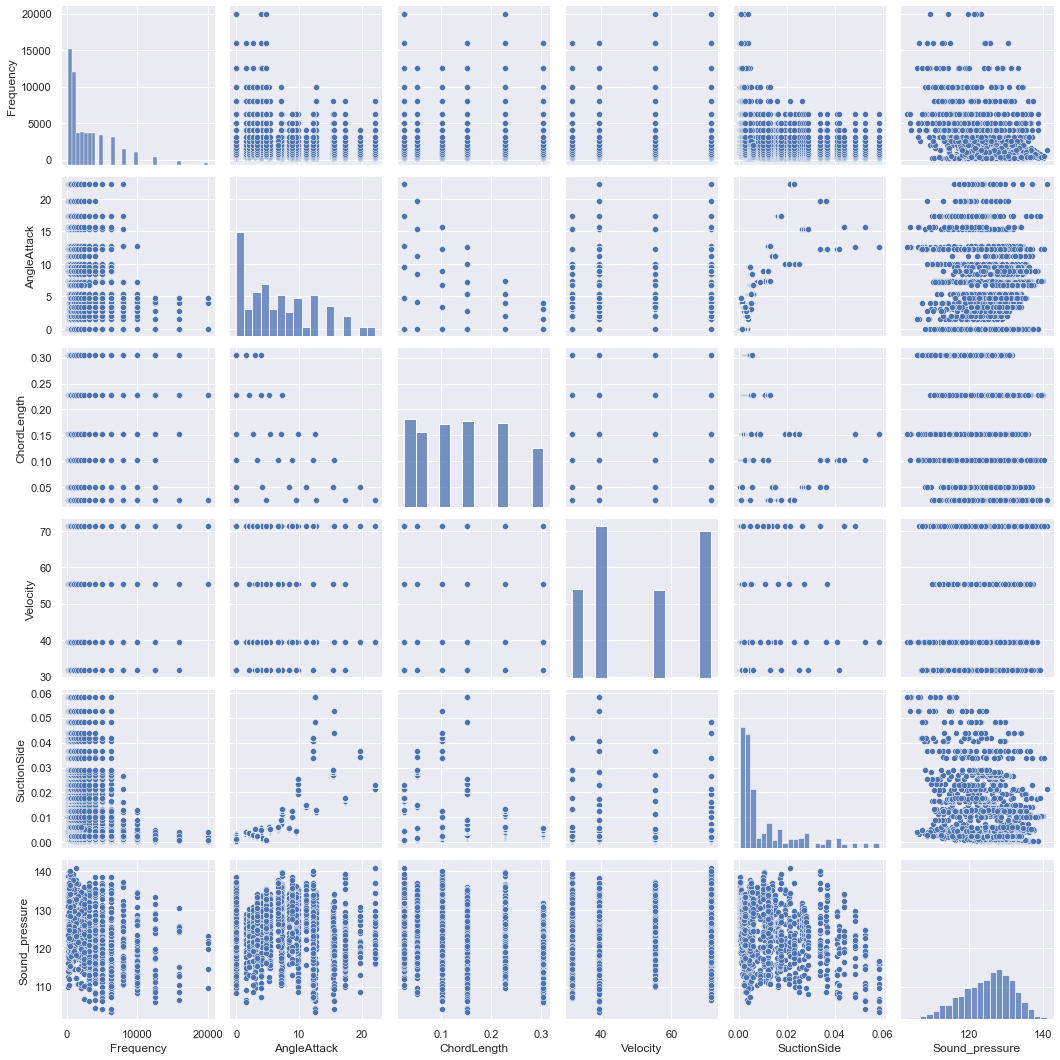

In [96]:
#Pair Plot:
sns.pairplot(data=data)

#Note:
#Frequency: Its positively skewed, 
#Frequency with AngleAttack,ChordLength and Velocity randomly distributed and 
#Frequency with SuctionSide and Sound_pressure is highly densed when Frequency is less than 5K 

#AngleAttack: Its near normal distribution with AngleAttack high count at 0, 
#AngleAttack with ChordLength,SuctionSide, Velocity and Sound_pressure randomly distributed and with SuctionSide its positive linear

#ChordLength: Its frequency count is almost same of its values , 
#ChordLength with SuctionSide, Velocity and Sound_pressure randomly distributed, SuctionSide and with AngleAttack its negative linear

#Velocity: Its frequency count is almost same of its values , 
#Velocity with ChordLength,SuctionSide, AngleAttack and Sound_pressure randomly distributed

#SuctionSide: Its positively skewed, 
#SuctionSide with Frequency negatively  linear and positively  linear with AngleAttack
#SuctionSide with ChordLength,SuctionSide,Velocity and Sound_pressure randomly distributed

#### 2. Data Pre-processing and cleaning [2M]

#### 1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks and its effect on model evaluation parameters.

In [97]:
# Exploring NA and Treatment for missing values
data.isnull().sum()
#Note: No NA/Missing Values in our dataset, So no need to Imputation/Treatment

Frequency         0
AngleAttack       0
ChordLength       0
Velocity          0
SuctionSide       0
Sound_pressure    0
dtype: int64

#### Outliers features: #Note: #From above EDA(by BOXPLOT), We see that features like Frequency,AngleAttack and SuctionSide have outlier values present in them.

In [98]:
#Treatment for outliers values
#Note:
import numpy as np
Q1=data['Frequency'].quantile(0.25)
Q3=data['Frequency'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['Frequency'] = np.where((data['Frequency']>Upper_Whisker),data['Frequency'].quantile(0.90),
                             np.where((data['Frequency']<Lower_Whisker),data['Frequency'].quantile(0.10),data['Frequency']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [99]:
#Note:
import numpy as np
Q1=data['AngleAttack'].quantile(0.25)
Q3=data['AngleAttack'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['AngleAttack'] = np.where((data['AngleAttack']>Upper_Whisker),data['AngleAttack'].quantile(0.90),
                             np.where((data['AngleAttack']<Lower_Whisker),data['AngleAttack'].quantile(0.10),data['AngleAttack']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [100]:
#Note:
import numpy as np
Q1=data['SuctionSide'].quantile(0.25)
Q3=data['SuctionSide'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['SuctionSide'] = np.where((data['SuctionSide']>Upper_Whisker),data['SuctionSide'].quantile(0.90),
                             np.where((data['SuctionSide']<Lower_Whisker),data['SuctionSide'].quantile(0.10),data['SuctionSide']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [101]:
#Collinearity Verification using Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_numeric = data._get_numeric_data()
X_numeric = add_constant(X_numeric)
VIF_frame = pd.Series([variance_inflation_factor(X_numeric.values, i) 
               for i in range(X_numeric.shape[1])], 
              index=X_numeric.columns).to_frame()

VIF_frame.drop('const', axis = 0, inplace = True) 
VIF_frame.rename(columns={VIF_frame.columns[0]: 'VIF'},inplace = True)
VIF_frame[~VIF_frame.isin([np.nan, np.inf, -np.inf]).any(1)]

#Note:
#No features VIF values are more than 10, so No multicollinearity is present.

,VIF
Frequency,1.834485
AngleAttack,5.246425
ChordLength,2.037802
Velocity,1.120214
SuctionSide,3.931227
Sound_pressure,2.050970


#### Note: No missing values in all features so, NO need for NA treatment and As mention above Frequency,AngleAttack and SuctionSide has outliers which we have treated with 90% quantile values for upper tail outliers


#### Our Target feature is Continuos,So No class imbalance

#### 2. Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore few techniques for identifying feature importance for your feature engineering task.

In [102]:
#Independed and depended features:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data[['Frequency', 'AngleAttack', 'ChordLength', 'Velocity', 'SuctionSide']]
Y = data['Sound_pressure']

<BarContainer object of 5 artists>

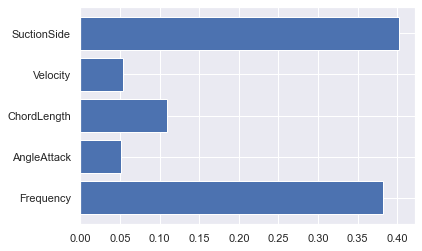

In [103]:
#feature importance
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, Y)
rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)

#Note
#From RandomForestRegressor we can see that SuctionSide and Frequency are highly IMPORTANT features
#We have not transformed the independent data before passing to randomforest because its NOT parameteric algorithm, so transformation not needed.

#### 3. Model Building [5M]

#### 1. Split the dataset into training and test sets. Answer without justification will not be awarded marks. [1M]

In [104]:
# Dataset Splitting & Scaling:
#Case 1:Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ;[ x_test1,y_test1] = 20% ;

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=823)

X_train_numeric = X_train._get_numeric_data()
X_test_numeric = X_test._get_numeric_data()
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), 
                                      index=X_train.index,
                                      columns=X_train_numeric.columns)
X_test_numeric_scaled = pd.DataFrame(scaler.transform(X_test_numeric), 
                                     index = X_test.index, 
                                     columns=X_test_numeric.columns)

X_train.update(X_train_numeric_scaled)
X_test.update(X_test_numeric_scaled)
print("Size of train data : ", X_train.shape)
print("Size of test data : ", X_test.shape)
X_train.head(2)

#Note: 
#We have used hold-out Cross validation technique for dataset splits with Training 80% and Test 20%
#We have used StandardScaler function for data transformation for parameteric model like regression, 
#so that all features with different scale are handled.

Size of train data :  (1202, 5)
Size of test data :  (301, 5)


,Frequency,AngleAttack,ChordLength,Velocity,SuctionSide
883,1.121250,1.564937,-0.921520,1.325138,1.507957
1343,2.486708,-0.583821,-0.376944,-1.217758,-0.709112


In [105]:
#Case 2:Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.90, random_state=23)

X_train_numeric2 = X_train2._get_numeric_data()
X_test_numeric2 = X_test2._get_numeric_data()
scaler = StandardScaler()
X_train_numeric_scaled2 = pd.DataFrame(scaler.fit_transform(X_train_numeric2), 
                                      index=X_train2.index,
                                      columns=X_train_numeric2.columns)
X_test_numeric_scaled2 = pd.DataFrame(scaler.transform(X_test_numeric2), 
                                     index = X_test2.index, 
                                     columns=X_test_numeric.columns)

X_train2.update(X_train_numeric_scaled2)
X_test2.update(X_test_numeric_scaled2)
print("Size of train data : ", X_train2.shape)
print("Size of test data : ", X_test2.shape)
X_train2.head(2)

#Note: 
#We have used hold-out Cross validation technique for dataset splits with Training 10% and Test 90%
#We have used StandardScaler function for data transformation for parameteric model like regression, 
#so that all features with different scale are handled.

Size of train data :  (150, 5)
Size of test data :  (1353, 5)


,Frequency,AngleAttack,ChordLength,Velocity,SuctionSide
1342,1.634185,-0.513867,-0.504642,-1.236525,-0.641629
1490,-0.983090,1.851966,-0.504642,-0.753444,2.283424


#### Note:  #We have used StandardScaler function for data transformation for parameteric model like regression, so that all features with different scale are handled.

#### 2. Explore k-fold cross validation. [1M]

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

In [107]:
# create a KFold object with 5 splits 
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
cvlm = lm.fit(X_train, y_train)
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(cvlm, X_train, y_train, scoring='r2', cv=folds)
scores  
print("R Square value:",np.mean(scores))

#Note:
#We have used 10-Fold Cross Validation techinique for Linear Regression Model to learn from.
#We can see R Square value for the Model is .49

R Square value: 0.4994902950556172


In [108]:
#Prediction: Cross validation
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(cvlm,X_test, y_test)
#Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(pred, y_test))  
print('Mean Squared Error:', metrics.mean_squared_error(pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(pred, y_test)))

#Note:
#By using 10-fold CV tech, MSE is 23.6 and MAE is 3.6

Mean Absolute Error: 3.6717491785113543
Mean Squared Error: 23.645131479833275
Root Mean Squared Error: 4.862625986011393


In [109]:
import pandas as pd
KVdata = {'Model':["LR"],
        'SplitType':["10-CV"],
        'RSquare':[0.499],
         'MAE':[3.671],
         'MSE':[23.645]}
ModelDataSet=pd.DataFrame(KVdata)
ModelDataSet

,Model,SplitType,RSquare,MAE,MSE
0,LR,10-CV,0.499,3.671,23.645


#### 3. Build Model/s using 1) Linear Regression (sklearn or other libraries can be used) [3M]

In [110]:
#We have build multiple Regression Models like LR,LASSO,RIDGE,ELASTICNET for Case 1 and Case 2 and 
#have seen the Model R Square scores and Performance Scores.

In [111]:
#Case 1 : Multi Linear Regression
lr = LinearRegression().fit(X_train, y_train)
print(lr)
print(lr.intercept_)
#R Square
pred = lr.predict(X_train)
print("R Square value:",metrics.r2_score(y_train, pred))
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

#Note:
# Built LR Model on case 1, With intercept == 124.886, R Square == 0.511
#We can see weights for each feactures below

LinearRegression()
124.88633444259568
R Square value: 0.5112237633515748


,Coefficient
Frequency,-4.084730
AngleAttack,-2.481817
ChordLength,-3.306793
Velocity,1.452134
SuctionSide,-1.782877


In [112]:
#Case 2: Multi Linear Regression
lr2 = LinearRegression().fit(X_train2, y_train2)
print(lr2)
print(lr2.intercept_)
#R Square
pred = lr2.predict(X_train2)
print("R Square value:",metrics.r2_score(y_train2, pred))
coeff_df2 = pd.DataFrame(lr2.coef_, X.columns, columns=['Coefficient'])
coeff_df2

#Note:
# Built LR Model on case 2, With intercept == 124.612, R Square == 0.469
#We can see weights for each feactures below

LinearRegression()
124.61225333333333
R Square value: 0.45858400219789797


,Coefficient
Frequency,-3.624001
AngleAttack,-0.789226
ChordLength,-2.912816
Velocity,2.024552
SuctionSide,-2.098299


#### 4. Performance Evaluation [2 M]

#### 1. Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model. Justify your answer. Answer without justification will not be awarded marks. [1M]

In [113]:
#Prediction on test
#Case 1 : Multi Linear Regression
predictions = lr.predict(X_test)
#Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(predictions, y_test))  
print('Mean Squared Error:', metrics.mean_squared_error(predictions, y_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions, y_test)))

#Note:
#We have done prediction on test data for Case 1

Mean Absolute Error: 3.556674733805485
Mean Squared Error: 22.400187360759695
Root Mean Squared Error: 4.732883620031206


In [114]:
#Case 2: Multi Linear Regression
predictions2 = lr2.predict(X_test2)
#Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(predictions2, y_test2))  
print('Mean Squared Error:', metrics.mean_squared_error(predictions2, y_test2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions2, y_test2)))

#Note:
#We have done prediction on test data for Case 2

Mean Absolute Error: 3.9263004544133886
Mean Squared Error: 25.37501226759206
Root Mean Squared Error: 5.037361637563066


In [115]:
ModelDataSet.loc[len(ModelDataSet.index)] = ['LR','Case-1',0.511,3.556,22.400]
ModelDataSet.loc[len(ModelDataSet.index)] = ['LR','Case-2',0.469,3.896,24.981]
ModelDataSet

,Model,SplitType,RSquare,MAE,MSE
0,LR,10-CV,0.499,3.671,23.645
1,LR,Case-1,0.511,3.556,22.400
2,LR,Case-2,0.469,3.896,24.981


In [116]:
#Analysis on K-CV, Case 1 and Case 2 Models and Performance Metrics:
#Points:
#1. We can see Case 1 has the highest R Square value compared to Case 2(due to less training data) and 10-CV(Slighty less than case 1)
#So, LR Model in Case 1 is Best Fit Line or Explain most variance in the dataset.

#2. Mean Absolute Error and Mean Square Error tends to increase when R-Square values decreases,
#So, Error is inversly proportional to RSquare values

#### 2. Comment on under fitting/overfitting/just right model. Justify your comment. Answer without justification will not be awarded marks. [1M]

In [117]:
#Under-fittings: 
#We see that HIGH Bias and High Variance in Test Dataset
#Degress of polynomial is less(Less number of features, which can explain the data)
#Error is HIGH and Accuracy in both Train and Test is VERY LESS


#Over-fittings: 
#We see that Low Bias and HIGH Variance in Test Dataset
#Degree of polynomial is High(Complex Models/Many features in Model, even if they dont explain)
#Train data error is LESS and Accuracy is HIGH, But Test data Accuracy is less


#Just Right: 
#We see Low Bias and Low Variance in Test Dataset
#Degree of polynomial is just right, with Important features which explains the data, We can check via Adjusted R-Square values
#Train and Test error is less, and Accuracy is good in Test Data.